In [254]:
import kwant
import tinyarray
import numpy as np
import scipy as spi
import scipy.constants as const
import scipy.signal as signal

import matplotlib.pyplot as plt 
import matplotlib.colors as colors
print(const.e)
plt.rcParams.update({'font.size': 20})

from scipy.signal import argrelextrema

mu_B = const.physical_constants['Bohr magneton'][0]
B = 14.7*mu_B*2./2./const.e*1000.
B/100.*47.

1.602176634e-19


0.3999192989789583

In [174]:
import pickle
qubit_splitting = pickle.load(open('./Data/Fourier_minimum_energy', 'rb'))
fourier_modes = pickle.load(open('./Data/Fourier_coefficients', 'rb'))
E_M_reconstruction = pickle.load(open('./Data/E_M_reconstruction', 'rb'))

In [176]:
qubit_no_eta = pickle.load(open('./qubit_no_eta', 'rb'))
E_M_no_eta = pickle.load(open('./E_M_no_eta', 'rb'))
fourier_no_eta = pickle.load(open('./fourier_no_eta', 'rb'))

In [114]:
fourier_modes.shape

(21, 49, 10)

In [69]:
phase_data = pickle.load(open('./Data/2D_colorplot_vary_etaB', 'rb'))
phase_boundary_array = []
for i in range(501):
    phase_boundary_array.append(argrelextrema(phase_data[i], np.less)[0])
phase_boundary_array = np.array(phase_boundary_array)
B_boundary_array = np.array([np.linspace(0, 14.7*mu_B*2./2./const.e*1000., 201)[phase_boundary_array[i]] for i in range(501)])

In [4]:
qubit_splitting.shape

(21, 49)

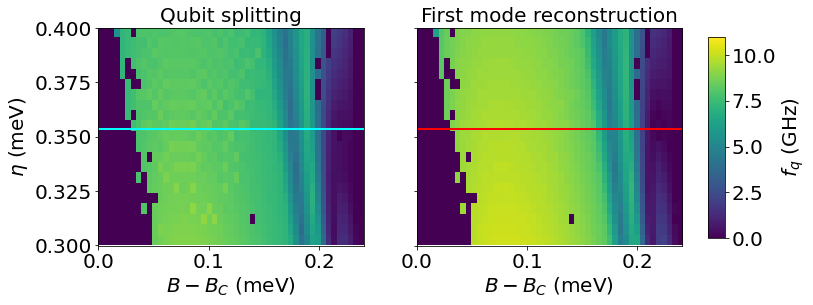

In [253]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6*2, 4))
axes.flat[0].imshow(qubit_splitting/1000., aspect = 'auto', extent=[0.,0.24,0.3, 0.4], origin='lower', vmin=0, vmax=11)
axes.flat[0].set_xlabel(r'$B-B_{C}$ (meV)')
axes.flat[0].set_ylabel(r'$\eta$ (meV)')
axes.flat[0].axhline(np.sqrt(2.)*350/1400, c='#00ffff', lw=2)
axes.flat[0].set_title('Qubit splitting', fontsize=20)

im = axes.flat[1].imshow(E_M_reconstruction/1000., aspect = 'auto', extent=[0.,0.24,0.3, 0.4], origin='lower', vmin=0, vmax=11)
axes.flat[1].set_xlabel(r'$B-B_{C}$ (meV)')
axes.flat[1].set_yticks(np.linspace(0.3, 0.4, 5))
axes.flat[1].set_yticklabels(['']*5)
axes.flat[1].set_title('First mode reconstruction', fontsize=20)
axes.flat[1].axhline(np.sqrt(2.)*350/1400, c='#ff0000', lw=2)

#for ax in axes.flat:
#    im = ax.imshow(np.random.random((10,10)), vmin=0, vmax=1)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.83, 0.15, 0.02, 0.7])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.ax.set_ylabel(r'$f_q$ (GHz)')
plt.savefig('./thesis_result_figures/splitting_together', dpi=300, bbox_inches='tight')

In [214]:
print("Before, figure default size is: ", plt.rcParams["figure.figsize"])

Before, figure default size is:  [6.0, 4.0]


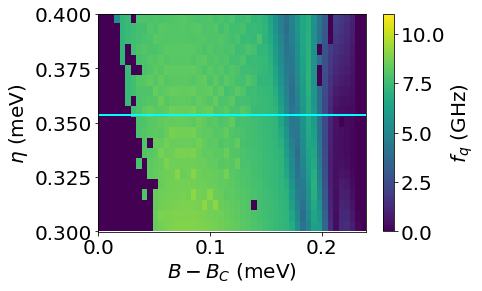

In [215]:
plt.figure(figsize=(6, 4))
plt.imshow(qubit_splitting/1000., aspect = 'auto', extent=[0.,0.24,0.3, 0.4], origin='lower', vmin=0, vmax=11)
plt.xlabel(r'$B-B_{C}$ (meV)')
plt.ylabel(r'$\eta$ (meV)')
cbar = plt.colorbar()
cbar.ax.set_ylabel(r'$f_q$ (GHz)')
plt.axhline(np.sqrt(2.)*350/1400, c='#00ffff', lw=2)
#plt.axhline(np.sqrt(2.)*350/1400, c='b')
#plt.plot([f(sim_eta_arr)[0][-1], f(sim_eta_arr)[-1][-1]], [0.4, 0.4], c='#00ffff', lw=2, ls='-.')
#plt.plot(B_boundary_adjusted0, eta_phase, c='r')
#plt.plot(B_boundary_adjusted1, eta_phase, c='r')
#plt.savefig('./thesis_result_figures/qubit_splitting', dpi=300, bbox_inches='tight')

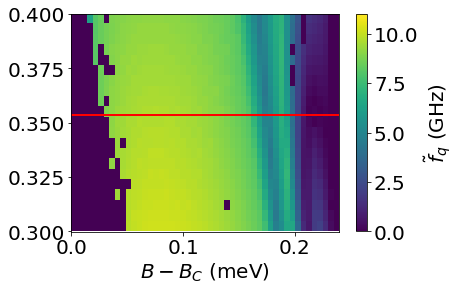

In [220]:
plt.imshow(E_M_reconstruction/1000., aspect = 'auto', extent=[0.,0.24,0.3, 0.4], origin='lower', vmin=0, vmax=11)
plt.xlabel(r'$B-B_{C}$ (meV)')
#ax.axes.yaxis.set_ticks([])
#plt.ylabel(r'$\eta$ (meV)')
cbar = plt.colorbar()
cbar.ax.set_ylabel(r'$\tilde{f}_q$ (GHz)')
plt.axhline(np.sqrt(2.)*350/1400, c='#ff0000', lw=2)
#plt.savefig('./thesis_result_figures/E_M_reconstruct', dpi=300, bbox_inches='tight')

Text(0, 0.5, '$f_q$ (GHz)')

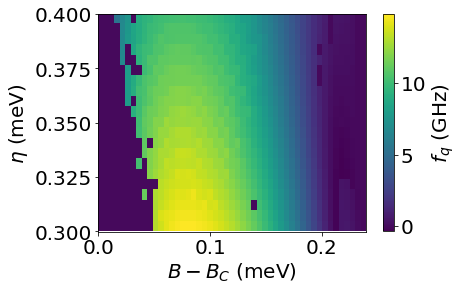

In [117]:
plt.imshow(fourier_modes[:,:,0]/1e9, aspect = 'auto', extent=[0.,0.24,0.3, 0.4], origin='lower')
plt.xlabel(r'$B-B_{C}$ (meV)')
plt.ylabel(r'$\eta$ (meV)')
cbar = plt.colorbar()
cbar.ax.set_ylabel(r'$f_q$ (GHz)')

Text(0, 0.5, '$f_q$ (GHz)')

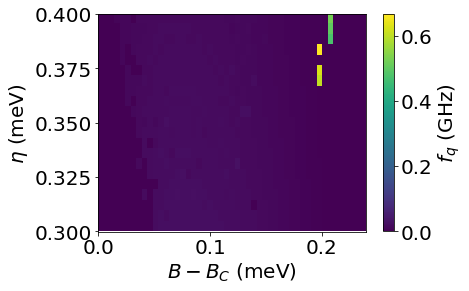

In [146]:
plt.imshow(fourier_modes[:,:,1]/1e9, aspect = 'auto', extent=[0.,0.24,0.3, 0.4], origin='lower')
plt.xlabel(r'$B-B_{C}$ (meV)')
plt.ylabel(r'$\eta$ (meV)')
cbar = plt.colorbar()
cbar.ax.set_ylabel(r'$f_q$ (GHz)')

In [124]:
Ec=512*10**6
Ej=4.7*10**9
ng=np.linspace(-2,2,9+8*60)

EM_splitting_array=np.zeros((len(sim_eta_arr),49))
energies=np.array([fn.qubit_energies(Ec,Ej,coeff_arr[eta_ind,B_ind,:],levels,g)/10**6 for g in ng])
split=min(energies[:,3]-energies[:,0]-(energies[:,2]-energies[:,1]))
energy_array[eta_ind,B_ind]=split

Text(0, 0.5, '$f_q$ (GHz)')

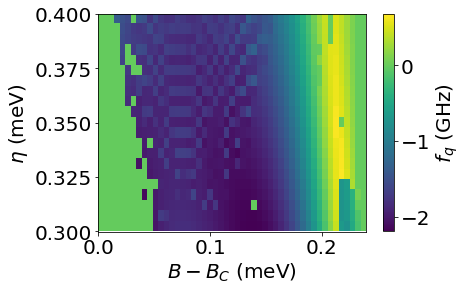

In [123]:
plt.imshow(fourier_modes[:,:,2]/1e9, aspect = 'auto', extent=[0.,0.24,0.3, 0.4], origin='lower')
plt.xlabel(r'$B-B_{C}$ (meV)')
plt.ylabel(r'$\eta$ (meV)')
cbar = plt.colorbar()
cbar.ax.set_ylabel(r'$f_q$ (GHz)')

In [107]:
qubit_splitting[11]

array([   0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        , 7677.44456782, 7871.80645039,
       8266.07703473, 8400.1418631 , 8209.60553635, 8220.11620662,
       8311.29845454, 8588.92985897, 8535.33988181, 8485.13446343,
       8516.17103238, 8598.41733194, 8273.14334236, 8389.09086654,
       8478.87484044, 8017.39125825, 8073.87129972, 8207.29158046,
       7948.67110478, 7854.81012802, 8137.36500044, 7907.88694876,
       7408.56692663, 7411.52939204, 7411.52036772, 7312.33549699,
       7179.38680093, 6321.44210944, 5280.06692864, 4209.64166666,
       4722.03004418, 5812.0757475 , 6861.41721498, 5934.13730338,
       4057.09509618, 2438.51968661, 1244.28259824,  547.06868322,
        457.40865518,  353.6069986 ,  335.56372766,    0.        ,
          0.        ])

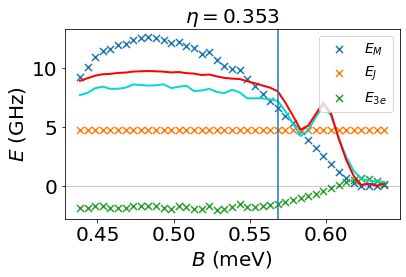

In [274]:
plt.figure(figsize=(6., 3.5))
plt.plot(f(sim_eta_arr)[:,11][6:-2], qubit_splitting[11][6:-2]/1000., c='#04d9d2', lw=2)
plt.plot(f(sim_eta_arr)[:,11][6:-2], E_M_reconstruction[11][6:-2]/1000., c='#ff0000', lw=2)
plt.scatter(f(sim_eta_arr)[:,11][6:-2], fourier_modes[:,:,0][11][6:-2]/1e9, marker='x', s=50, label=r'$E_M$')
plt.scatter(f(sim_eta_arr)[:,11][6:-2], np.array([4.7]*len(f(sim_eta_arr)[:,11][6:-2])), marker='x', s=50, label=r'$E_{J}$')
plt.scatter(f(sim_eta_arr)[:,11][6:-2], fourier_modes[:,:,2][11][6:-2]/1e9, marker='x', s=50, label=r'$E_{3e}$')
#plt.scatter(f(sim_eta_arr)[:,11][6:-2], (fourier_modes[:,:,0][11][6:-2]+fourier_modes[:,:,2][11][6:-2])/1e9)
#plt.scatter(f(sim_eta_arr)[:,11][6:-2], (np.abs(fourier_modes[:,:,0][11][6:-2])+np.abs(fourier_modes[:,:,2][11][6:-2]))/1e9)
plt.xlabel(r'$B$ (meV)')
plt.ylabel(r'$E$ (GHz)')
plt.axhline(0, c='k', alpha=0.3, lw=0.7)
plt.legend(fontsize=14, loc=1)
plt.title(r'$\eta=0.353$', fontsize=20)
plt.axvline(f(sim_eta_arr)[:,11][6:-2][26])
#plt.savefig('./thesis_result_figures/cross_eta', dpi=300, bbox_inches='tight')
#plt.yscale('symlog')
#plt.xlim(f(sim_eta_arr)[:,11][0]-0.01, f(sim_eta_arr)[:,11][-1]+0.01)

In [275]:
qubit_splitting[11][6:-2][:26]/1000.

array([7.67744457, 7.87180645, 8.26607703, 8.40014186, 8.20960554,
       8.22011621, 8.31129845, 8.58892986, 8.53533988, 8.48513446,
       8.51617103, 8.59841733, 8.27314334, 8.38909087, 8.47887484,
       8.01739126, 8.0738713 , 8.20729158, 7.9486711 , 7.85481013,
       8.137365  , 7.90788695, 7.40856693, 7.41152939, 7.41152037,
       7.3123355 ])

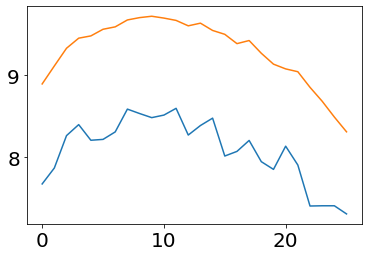

In [277]:
plt.plot(qubit_splitting[11][6:-2][:26]/1000.)
plt.plot(E_M_reconstruction[11][6:-2][:26]/1000.)

In [278]:
np.average(E_M_reconstruction[11][6:-2][:26]/1000.)

9.302409113414111

In [280]:
from scipy import stats
print(stats.sem(E_M_reconstruction[11][6:-2][:26]/1000.))

0.07704371491109002


In [281]:
np.average(qubit_splitting[11][6:-2][:26]/1000.)

8.096647355201684

In [282]:
print(stats.sem(qubit_splitting[11][6:-2][:26]/1000.))

0.07707676418536598


In [283]:
(0.0314275434498084+0.007090317929544331+0.07704371491109002+0.07707676418536598)/4

0.048159585118952186

In [276]:
E_M_reconstruction[11][6:-2][:26]/1000.

array([8.89555928, 9.11469989, 9.33025262, 9.45308366, 9.48068924,
       9.56161735, 9.59084581, 9.67497554, 9.70339941, 9.72019273,
       9.69778623, 9.66947225, 9.60343617, 9.63592789, 9.54705894,
       9.50003301, 9.38657996, 9.42432499, 9.2690565 , 9.13661993,
       9.07886145, 9.04445711, 8.8542795 , 8.68480389, 8.49228837,
       8.31233524])

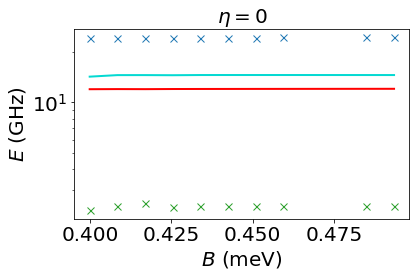

In [262]:
import scipy.constants as const
mu_B = const.physical_constants['Bohr magneton'][0]
B_array = np.linspace(0., 14.7*mu_B*2./2./const.e*1000., 101)

plt.figure(figsize=(6., 3.5))
plt.semilogy(B_array[np.r_[np.arange(47, 55), 57, 58]], qubit_no_eta/1000., c='#04d9d2', lw=2)
plt.semilogy(B_array[np.r_[np.arange(47, 55), 57, 58]], E_M_no_eta/1000., c='#ff0000', lw=2)
#plt.plot(B_array[np.r_[np.arange(47, 55), 57, 58]], E_up_to_3_reconstruction, label='E_3e')
scatter_color_array = ['#1f77b4', '#ff7f0e', '#2ca02c']
for i in range(0,3,2):
    plt.semilogy(B_array[np.r_[np.arange(47, 55), 57, 58]], fourier_no_eta[:,i]/1e9, marker='x', markersize=7, ls='', c=scatter_color_array[i])
#plt.axhline(0)
plt.xlabel(r'$B$ (meV)')
plt.ylabel(r'$E$ (GHz)')
plt.title(r'$\eta=0$', fontsize=20)
plt.savefig('./thesis_result_figures/cross_no_eta', dpi=300, bbox_inches='tight')

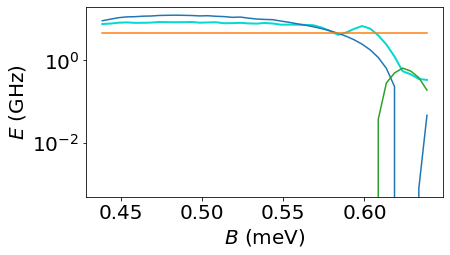

In [151]:
plt.figure(figsize=(6.4, 3.5))
plt.semilogy(f(sim_eta_arr)[:,11][6:-2], qubit_splitting[11][6:-2]/1000., c='#04d9d2', lw=2, label=r'$f_q$')
plt.semilogy(f(sim_eta_arr)[:,11][6:-2], fourier_modes[:,:,0][11][6:-2]/1e9, label=r'$E_M$')
plt.semilogy(f(sim_eta_arr)[:,11][6:-2], np.array([4.7]*len(f(sim_eta_arr)[:,11][6:-2])), label=r'$E_{J}$')
plt.semilogy(f(sim_eta_arr)[:,11][6:-2], fourier_modes[:,:,2][11][6:-2]/1e9, label=r'$E_{3e}$')
plt.ylim()
#plt.scatter(f(sim_eta_arr)[:,11][6:-2], (fourier_modes[:,:,0][11][6:-2]+fourier_modes[:,:,2][11][6:-2])/1e9)
#plt.scatter(f(sim_eta_arr)[:,11][6:-2], (np.abs(fourier_modes[:,:,0][11][6:-2])+np.abs(fourier_modes[:,:,2][11][6:-2]))/1e9)
plt.xlabel(r'$B$ (meV)')
plt.ylabel(r'$E$ (GHz)')
plt.axhline(0, c='k', alpha=0.3, lw=0.7)
#plt.legend(fontsize=14, loc=1)

In [105]:
f(sim_eta_arr)[:,11]

array([0.4085, 0.4135, 0.4185, 0.4235, 0.4285, 0.4335, 0.4385, 0.4435,
       0.4485, 0.4535, 0.4585, 0.4635, 0.4685, 0.4735, 0.4785, 0.4835,
       0.4885, 0.4935, 0.4985, 0.5035, 0.5085, 0.5135, 0.5185, 0.5235,
       0.5285, 0.5335, 0.5385, 0.5435, 0.5485, 0.5535, 0.5585, 0.5635,
       0.5685, 0.5735, 0.5785, 0.5835, 0.5885, 0.5935, 0.5985, 0.6035,
       0.6085, 0.6135, 0.6185, 0.6235, 0.6285, 0.6335, 0.6385, 0.6435,
       0.6485])

CompositeGenericTransform(
    Affine2D(
        [[ 1.          0.70020754 -0.2       ]
         [ 0.          1.          0.        ]
         [ 0.          0.          1.        ]]),
    CompositeGenericTransform(
        TransformWrapper(
            BlendedAffine2D(
                IdentityTransform(),
                IdentityTransform())),
        CompositeGenericTransform(
            BboxTransformFrom(
                TransformedBbox(
                    Bbox(x0=0.37, y0=0.3, x1=0.61, y1=0.4),
                    TransformWrapper(
                        BlendedAffine2D(
                            IdentityTransform(),
                            IdentityTransform())))),
            BboxTransformTo(
                TransformedBbox(
                    Bbox(x0=0.125, y0=0.125, x1=0.9, y1=0.88),
                    BboxTransformTo(
                        TransformedBbox(
                            Bbox(x0=0.0, y0=0.0, x1=6.0, y1=4.0),
                            Affine2D(
      

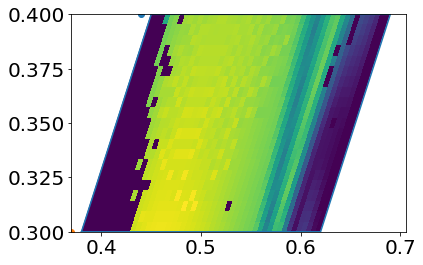

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms


'''def get_image():
    delta = 0.25
    x = y = np.arange(-3.0, 3.0, delta)
    X, Y = np.meshgrid(x, y)
    Z1 = np.exp(-X**2 - Y**2)
    Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
    Z = (Z1 - Z2)
    return Z'''


def do_plot(ax, Z, transform):
    im = ax.imshow(Z, aspect = 'auto', extent=[0.37,0.61,0.3, 0.4], origin='lower')

    trans_data = transform + ax.transData
    print(trans_data)
    im.set_transform(trans_data)

    # display intended extent of the image
    x1, x2, y1, y2 = im.get_extent()
    print(x2)
    ax.plot([x1, x2, x2, x1, x1], [y1, y1, y2, y2, y1],
            transform=trans_data)
    #ax.set_xlim(-5, 5)
    #ax.set_ylim(-4, 4)


# prepare image and figure
fig, ax = plt.subplots(1)
Z = qubit_splitting/1000.

# image rotation
#do_plot(ax1, Z, mtransforms.Affine2D().rotate_deg(30))

# image skew
do_plot(ax, Z, mtransforms.Affine2D().skew_deg(35, 0.).translate(-.20, 0))
#plt.xlim(0.37, 0.68)
plt.scatter([0.44], [0.4])
plt.scatter([0.37], 0.3)

# scale and reflection
#do_plot(ax3, Z, mtransforms.Affine2D().scale(-1, .5))

# everything and a translation
#do_plot(ax4, Z, mtransforms.Affine2D().
#        rotate_deg(30).skew_deg(30, 15).scale(-1, .5).translate(.5, -1))

In [94]:
sim_eta_arr=np.linspace(0.3,0.4,21)
f = lambda eta: np.linspace(0.37+0.7*(eta-0.3),0.37+0.7*(eta-0.3)+0.24,49)

In [106]:
sim_eta_arr

array([0.3  , 0.305, 0.31 , 0.315, 0.32 , 0.325, 0.33 , 0.335, 0.34 ,
       0.345, 0.35 , 0.355, 0.36 , 0.365, 0.37 , 0.375, 0.38 , 0.385,
       0.39 , 0.395, 0.4  ])

In [95]:
f(sim_eta_arr)[:,0]

array([0.37 , 0.375, 0.38 , 0.385, 0.39 , 0.395, 0.4  , 0.405, 0.41 ,
       0.415, 0.42 , 0.425, 0.43 , 0.435, 0.44 , 0.445, 0.45 , 0.455,
       0.46 , 0.465, 0.47 , 0.475, 0.48 , 0.485, 0.49 , 0.495, 0.5  ,
       0.505, 0.51 , 0.515, 0.52 , 0.525, 0.53 , 0.535, 0.54 , 0.545,
       0.55 , 0.555, 0.56 , 0.565, 0.57 , 0.575, 0.58 , 0.585, 0.59 ,
       0.595, 0.6  , 0.605, 0.61 ])

In [96]:
f(sim_eta_arr)[:,-1]

array([0.44 , 0.445, 0.45 , 0.455, 0.46 , 0.465, 0.47 , 0.475, 0.48 ,
       0.485, 0.49 , 0.495, 0.5  , 0.505, 0.51 , 0.515, 0.52 , 0.525,
       0.53 , 0.535, 0.54 , 0.545, 0.55 , 0.555, 0.56 , 0.565, 0.57 ,
       0.575, 0.58 , 0.585, 0.59 , 0.595, 0.6  , 0.605, 0.61 , 0.615,
       0.62 , 0.625, 0.63 , 0.635, 0.64 , 0.645, 0.65 , 0.655, 0.66 ,
       0.665, 0.67 , 0.675, 0.68 ])

In [97]:
f(sim_eta_arr)[0]

array([0.37  , 0.3735, 0.377 , 0.3805, 0.384 , 0.3875, 0.391 , 0.3945,
       0.398 , 0.4015, 0.405 , 0.4085, 0.412 , 0.4155, 0.419 , 0.4225,
       0.426 , 0.4295, 0.433 , 0.4365, 0.44  ])

In [36]:
0.44-0.37

0.07

In [65]:
0.68-0.44

0.24000000000000005

In [66]:
0.61-0.37

0.24

In [78]:
B_boundary_adjusted0 = B_boundary_array[:,0][300:401]-f(eta_phase)[0]
B_boundary_adjusted1 = B_boundary_array[:,1][300:401]-f(eta_phase)[0]

In [75]:
eta_phase = sim_eta_arr=np.linspace(0.3,0.4,101)
f(eta_phase)[0]

array([0.37  , 0.3707, 0.3714, 0.3721, 0.3728, 0.3735, 0.3742, 0.3749,
       0.3756, 0.3763, 0.377 , 0.3777, 0.3784, 0.3791, 0.3798, 0.3805,
       0.3812, 0.3819, 0.3826, 0.3833, 0.384 , 0.3847, 0.3854, 0.3861,
       0.3868, 0.3875, 0.3882, 0.3889, 0.3896, 0.3903, 0.391 , 0.3917,
       0.3924, 0.3931, 0.3938, 0.3945, 0.3952, 0.3959, 0.3966, 0.3973,
       0.398 , 0.3987, 0.3994, 0.4001, 0.4008, 0.4015, 0.4022, 0.4029,
       0.4036, 0.4043, 0.405 , 0.4057, 0.4064, 0.4071, 0.4078, 0.4085,
       0.4092, 0.4099, 0.4106, 0.4113, 0.412 , 0.4127, 0.4134, 0.4141,
       0.4148, 0.4155, 0.4162, 0.4169, 0.4176, 0.4183, 0.419 , 0.4197,
       0.4204, 0.4211, 0.4218, 0.4225, 0.4232, 0.4239, 0.4246, 0.4253,
       0.426 , 0.4267, 0.4274, 0.4281, 0.4288, 0.4295, 0.4302, 0.4309,
       0.4316, 0.4323, 0.433 , 0.4337, 0.4344, 0.4351, 0.4358, 0.4365,
       0.4372, 0.4379, 0.4386, 0.4393, 0.44  ])